<p><font size="6"><b>Pandas para Series de Tiempo</b></font></p>

Tomado y traducido de https://github.com/jorisvandenbossche/pandas-tutorial, Tutorial de  Joris Van den Bossche and Stijn Van Hoey (mailto:jorisvandenbossche@gmail.com, mailto:stijnvanhoey@gmail.com), todo el credito a ellos.

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_rows = 8 #Cantidad maxima de filas en el plot

# Introduccion: Modulo `datetime`

Python contiene el modulo `datetime` para manejar datos de fecha y hora:

In [ ]:
import datetime

In [ ]:
#Se crea una variable con la fecha y hora especfica y se imprime
dt = datetime.datetime(year=2016, month=12, day=19, hour=13, minute=30)
dt


datetime.datetime(2016, 12, 19, 13, 30)

In [ ]:
print(dt) # .day,...

2016-12-19 13:30:00


In [ ]:
print(dt.strftime("%d %B %Y"))

19 December 2016


# Fechas y tiempos en Pandas

## El objeto ``Timestamp``

Pandas tiene sus propios objetos de fecha y tiempo (hora), los cuales son compatibles con el objeto estandar `datetime`, pero provee algunas mas funcionalidades para trabar con él.  

El objeto `Timestamp` puede tambien ser construido desde un string (cadena de caracteres `str`):

In [ ]:
ts = pd.Timestamp('2016-12-19')
ts

Timestamp('2016-12-19 00:00:00')

Asi como con los objetos `datetime.datetime`, existen muchos atributos utiles disponibles en `Timestamp`. Por ejemplo, podemos obtener el mes de cada registro:

In [ ]:
ts.month

12

In [ ]:
ts + pd.Timedelta('5 days')

Timestamp('2016-12-24 00:00:00')

### Analizando los strings de `datetime`

![](http://imgs.xkcd.com/comics/iso_8601.png)


Desafortunadamente, cuando se trabaja con datos reales, se encuentran muchos formatos `datetime` diferentes. La mayoria de ellos vienen con el formato de texto de un archivo `CSV`. Para trabajar con estos datos en Pandas, primero debemos hacer un *parsing* de los caracteres a objetos de tipo `Timestamp`.

<div class="alert alert-info">
<b>RECUERDA</b>: <br><br>

De fechas en formato *string* a objetos `Timestamp`: Funcion `to_datetime`
</div>



In [ ]:
pd.to_datetime("2016-12-09")

Timestamp('2016-12-09 00:00:00')

In [ ]:
pd.to_datetime("09/12/2016")

Timestamp('2016-09-12 00:00:00')

In [ ]:
pd.to_datetime("09/12/2016", dayfirst=True)

Timestamp('2016-12-09 00:00:00')

In [ ]:
pd.to_datetime("09/12/2016", format="%d/%m/%Y")

Timestamp('2016-12-09 00:00:00')

Una descripcion detallada de como especificar el formato de la cadena de caracteres (*string*), esta disponible en: https://docs.python.org/3.5/library/datetime.html#strftime-and-strptime-behavior

## Datos de tipo `Timestamp` en una columna de una `Series` o `DataFrame`de Pandas

In [ ]:
s = pd.Series(['2016-12-09 10:00:00', '2016-12-09, 11:00:00', '2016-12-09 12:00:00'])

La funcion `to_datetime` puede tambien ser usada para convertir una serie completa de *strings*:

In [ ]:
ts = pd.to_datetime(s)

In [ ]:
ts

0   2016-12-09 10:00:00
1   2016-12-09 11:00:00
2   2016-12-09 12:00:00
dtype: datetime64[ns]

Note que el tipo de dato de esta serie: el `datetime64[ns]` dtype. Esto indica que tenemos series de valores de tipo `datetime`.

Los mismos atributos como en `Timestamp` singulares tambien estan disponibles en una Serie con datos de tipo `datetime`,  usando el *accesor* **`.dt`**:

In [ ]:
ts.dt.hour

0    10
1    11
2    12
dtype: int64

In [ ]:
ts.dt.weekday

0    4
1    4
2    4
dtype: int64

Para construir rapidamente un conjunto de datos de tipo tiempo, usar la funcion [``pd.date_range``](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html) :

In [ ]:
pd.Series(pd.date_range(start="2016-01-01", periods=10, freq='3H'))

0   2016-01-01 00:00:00
1   2016-01-01 03:00:00
2   2016-01-01 06:00:00
3   2016-01-01 09:00:00
            ...        
6   2016-01-01 18:00:00
7   2016-01-01 21:00:00
8   2016-01-02 00:00:00
9   2016-01-02 03:00:00
Length: 10, dtype: datetime64[ns]

# Datos de series de tiempo: `Timestamp` en el indice (*index*)

## Ejemplo: Datos de descarga de un rio

Para la siguiente demostracion de las funcionalidades de las series de tiempo, usamos un ejemplo de datos de descarga de; rio Marrkebeek (Flanders) con 3 horas de valores promediados, tomados de [Waterinfo website](https://www.waterinfo.be/).

In [ ]:
data_link = "https://raw.githubusercontent.com/jorisvandenbossche/pandas-tutorial/master/data/flowdata.csv"
data = pd.read_csv(data_link)

In [ ]:
data.head()

,Time,L06_347,LS06_347,LS06_348
0,2009-01-01 00:00:00,0.137417,0.097500,0.016833
1,2009-01-01 03:00:00,0.131250,0.088833,0.016417
2,2009-01-01 06:00:00,0.113500,0.091250,0.016750
3,2009-01-01 09:00:00,0.135750,0.091500,0.016250
4,2009-01-01 12:00:00,0.140917,0.096167,0.017000


Ya sabemos como pasar una columna de tiempos o fechas con Pandas:

In [ ]:
data['Time'] = pd.to_datetime(data['Time'])

Con `set_index('datetime')`, ponemos la columna con valores de fecha y hora (*datetime*) como el indice (*index*) de nuestra tabla de Pandas, esto se puede realizar para `Series` y `DataFrame`.

In [ ]:
data = data.set_index("Time")

In [ ]:
data

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
...,...,...,...
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-02 00:00:00,0.860000,0.860000,0.075000


Los pasos de arriba son provistos por una funcionalidad construida dentro (*built-in*) de la funcion `read_csv`:

In [ ]:
data = pd.read_csv(data_link, index_col=0, parse_dates=True)

<div class="alert alert-info">
<b>RECUERDA</b>: <br><br>

`pd.read_csv` provee muchas funcionalidades construidas-dentro para ayudar en este tipo de transacciones cuando se lee un archivo! Revisa ala ayuda de la funcion `read_csv`...
</div>

## El DatetimeIndex

Cuando nos aseguramos que el DataFrame tiene un `DatetimeIndex`, las funcionalidades relacionadas con time-series se hacen disponibles:

In [ ]:
data.index

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 03:00:00',
               '2009-01-01 06:00:00', '2009-01-01 09:00:00',
               '2009-01-01 12:00:00', '2009-01-01 15:00:00',
               '2009-01-01 18:00:00', '2009-01-01 21:00:00',
               '2009-01-02 00:00:00', '2009-01-02 03:00:00',
               ...
               '2012-12-31 21:00:00', '2013-01-01 00:00:00',
               '2013-01-01 03:00:00', '2013-01-01 06:00:00',
               '2013-01-01 09:00:00', '2013-01-01 12:00:00',
               '2013-01-01 15:00:00', '2013-01-01 18:00:00',
               '2013-01-01 21:00:00', '2013-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=11697, freq=None)

Similar a una Serie con datos de fecha y hora, hay algunos atributos disponibles para los valores de tipo tiempo:

In [ ]:
data.index.day

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
            ...
            31,  1,  1,  1,  1,  1,  1,  1,  1,  2],
           dtype='int64', name='Time', length=11697)

In [ ]:
data.index.dayofyear

Int64Index([  1,   1,   1,   1,   1,   1,   1,   1,   2,   2,
            ...
            366,   1,   1,   1,   1,   1,   1,   1,   1,   2],
           dtype='int64', name='Time', length=11697)

In [ ]:
data.index.year

Int64Index([2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009,
            ...
            2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013],
           dtype='int64', name='Time', length=11697)

El metodo `plot` tambien adaptara sus etiquetas (cuando se haga acercamiento,se pueden ver los diferentes niveles de detalle):


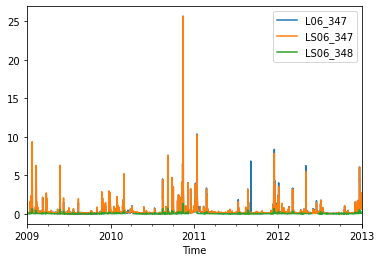

In [ ]:
data.plot()

Tenemos muchos datos para una sola figura. Veamos como facilmente seleccionar un parte de los datos o agregar los datos en otras resoluciones de tiempo, en las siguientes secciones.

## Seleccionando datos desde una serie de tiempo

Podemos usar el indexado basado en etiqueta de una series de tiempo:

In [ ]:
data[pd.Timestamp("2012-01-01 09:00"):pd.Timestamp("2012-01-01 19:00")]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083


Pero, para conveniencia, la indexacion de una serie de tiempo tambien funciona con *strings*:

In [ ]:
data["2012-01-01 09:00":"2012-01-01 19:00"]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083


Una buena caracteristica es **"partial string" indexing**, donde podemos hacer una particion implicita por medio de un *string* parcial de fecha y hora.

Por ejemplo todos los datos del 2013:

In [ ]:
data['2013']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,L06_347,LS06_347,LS06_348
Time,,,
2013-01-01 00:00:00,1.688333,1.688333,0.207333
2013-01-01 03:00:00,2.693333,2.693333,0.201500
2013-01-01 06:00:00,2.220833,2.220833,0.166917
2013-01-01 09:00:00,2.055000,2.055000,0.175667
...,...,...,...
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-02 00:00:00,0.860000,0.860000,0.075000


Normalmente se esperaria accedes a las columna llamada '2013', pero para un DatetimeIndex, Pandas tambien trata de interpretarlo como una particion de tipo fecha y hora.

Todos los datos de Enero hasta Marzo 2012:

In [ ]:
data['2012-01':'2012-03']

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 00:00:00,0.307167,0.273917,0.028000
2012-01-01 03:00:00,0.302917,0.270833,0.030583
2012-01-01 06:00:00,0.331500,0.284750,0.030917
2012-01-01 09:00:00,0.330750,0.293583,0.029750
...,...,...,...
2012-03-31 12:00:00,0.098333,0.124417,0.011833
2012-03-31 15:00:00,0.091917,0.123917,0.011500
2012-03-31 18:00:00,0.085750,0.121417,0.011000
2012-03-31 21:00:00,0.068417,0.119750,0.010417


<div class="alert alert-success">

<b>Ejercicio</b>:

 <ul>
  <li>Seleccionar todos los datos empezando desde el 2012</li>
</ul>
</div>

In [ ]:
# Hacer aqui el codigo


<div class="alert alert-success">

<b>EJERCICIO</b>:

 <ul>
  <li>Seleccionar todos los datos en Enero (*January*) para todos los diferentes años.</li>
</ul>
</div>

In [ ]:
# Hacer aqui el codigo


<div class="alert alert-success">

<b>EJERCICIO</b>:

 <ul>
  <li>Seleccionar todos datos en Enero, Febrero, y Marzo para todos los diferentes años.</li>
</ul>
</div>

In [ ]:
# Hacer aqui el codigo


<div class="alert alert-success">

<b>EJERICIO</b>:

 <ul>
  <li>Seleccionar todo los datos 'daytime' (entre 8h y 20h) para todos los dias.</li>
</ul>
</div>

In [ ]:
# Hacer aqui el codigo


## El poder de Pandas: `resample` (remuestreo)

Un metodos muy poderoso es **`resample`: converting the frequency of the time series** (convirtiendo la frecuencia de la serie de tiempo). Por ejemplo desde las horas a datos diarios.

La serie de tiempo tiene una frecuencia de una hora. Queremos cambiarla a diariamente:

In [ ]:
data.resample('D').mean()

In [ ]:
data.resample('1H').ffill().head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 01:00:00,0.137417,0.097500,0.016833
2009-01-01 02:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 04:00:00,0.131250,0.088833,0.016417


In [ ]:
data['2009-01-01'].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


L06_347     0.140917
LS06_347    0.097500
LS06_348    0.017583
dtype: float64

<div class="alert alert-danger">

<b>NOTA</b>:

 <ul>
  <li>con las versiones viejas de Pandas, <code>data.resample('D').mean()</code> era expresado como <code>data.resample('D', how='mean')</code>.</li>
</ul>
</div>

otros metodos matematicos tambien pueden ser especificados:

In [ ]:
data.resample('D').max().head()

<div class="alert alert-info">
<b>RECUERDA</b>: <br><br>

    La cadena de caracteres para especificar la nueva frecuencia temporal: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases <br><br>
            
    Estas cadenas de caracters se pueden combinar con numeros, por ejemplo `'10D'`...

</div>



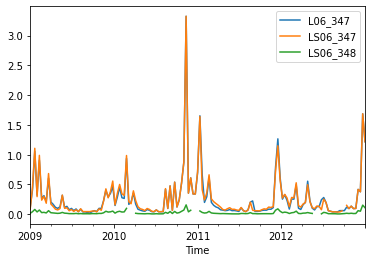

In [ ]:
data.resample('10D').mean().plot() # 10D

<div class="alert alert-success">

<b>EJERCICIO</b>:

 <ul>
  <li>Grafique la desviacion estadar mensual de las columnas.</li>
</ul>
</div>

In [ ]:
# Hacer aqui el codigo


<div class="alert alert-success">

<b>EJERCICIO</b>:

 <ul>
  <li>Graficar la media y mediana mensual para los años 2011-2012 para la comuna 'L06_347'.<br><br></li>
</ul>
    
    **Nota** <br>Puede crear una nueva figura con `fig, ax = plt.subplots()` y adicionar cada una de las graficas al objeto `ax` (ver la documentacion de pandas de la funcion plot)
</div>

In [ ]:
# Hacer aqui el codigo


<div class="alert alert-success">

<b>EJERCICIO</b>:

 <ul>
  <li>Graficar el minimo y el maximo mensual del valor del promedio diario para la columna 'LS06_348'</li>
</ul>
</div>

In [ ]:
# Hacer aqui el codigo


In [ ]:
# Hacer aqui el codigo


<div class="alert alert-success">
<b>EJERICIO</b>:

 <ul>
  <li>Hacer un grafico de barras de la media de las estaciones del año para el 2013 (Observacion: crear un objeto `fig, ax = plt.subplots()` y agregar el grafico la variable `ax` creada.</li>
</ul>

</div>

In [ ]:
# Hacer aqui el codigo




<div class="alert alert-success">
<b>EJERCICIO</b>:

 <ul>
  <li>Calcular el patron anual tipico con resolucion mensual (graficar el promedio mensual tipico sobre los años).</li>
</ul>

</div>

In [ ]:
# Hacer aqui el codigo
